In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set up visualizations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


data = pd.read_csv('/Users/sahilnakrani/Documents/NN/Data/munich_weather_2000_2024.csv')
# Check column names
print(data.columns)

# Replace 'date' with the actual column name based on the output from the above step
data['date'] = pd.to_datetime(data['date'])



Index(['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')


In [2]:
# Display the first few rows of the dataset to verify the data is loaded
print("First 5 rows of the dataset:")
print(data.head())

# Display the column names to verify the structure
print("\nColumn names in the dataset:")
print(data.columns)

# Display basic statistics of the data to get an overview of numerical features
print("\nStatistical Summary of the dataset:")
print(data.describe())

# Check the shape of the data (rows, columns)
print("\nShape of the dataset (rows, columns):", data.shape)

# Check for missing values in the data
print("\nChecking for missing values:")
print(data.isnull().sum())

First 5 rows of the dataset:
        date  tavg  tmin  tmax  prcp   snow   wdir  wspd  wpgt    pres  tsun
0 2000-01-01   1.7  -0.5   2.6   2.0  100.0  243.0   9.4  33.8  1026.6     0
1 2000-01-02   1.9  -0.2   5.8   0.0   30.0  275.0   7.6  29.5  1032.1   366
2 2000-01-03  -0.4  -3.3   0.9   0.0    0.0  267.0   7.6  24.8  1030.7    24
3 2000-01-04   3.8  -2.8   6.6   0.4    0.0  225.0   9.7  42.1  1024.5   270
4 2000-01-05   5.3   4.3   7.3   0.0    0.0  255.0  11.9  47.5  1024.6    12

Column names in the dataset:
Index(['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')

Statistical Summary of the dataset:
                      date         tavg         tmin         tmax  \
count                 9010  9010.000000  9010.000000  9010.000000   
mean   2012-05-01 12:00:00    10.444118     6.284062    15.029711   
min    2000-01-01 00:00:00   -12.900000   -16.600000    -9.900000   
25%    2006-03-02 06:00:00     4.400000  

First few rows of the data:
        date  tavg  tmin  tmax  prcp   snow   wdir  wspd  wpgt    pres  tsun
0 2000-01-01   1.7  -0.5   2.6   2.0  100.0  243.0   9.4  33.8  1026.6     0
1 2000-01-02   1.9  -0.2   5.8   0.0   30.0  275.0   7.6  29.5  1032.1   366
2 2000-01-03  -0.4  -3.3   0.9   0.0    0.0  267.0   7.6  24.8  1030.7    24
3 2000-01-04   3.8  -2.8   6.6   0.4    0.0  225.0   9.7  42.1  1024.5   270
4 2000-01-05   5.3   4.3   7.3   0.0    0.0  255.0  11.9  47.5  1024.6    12


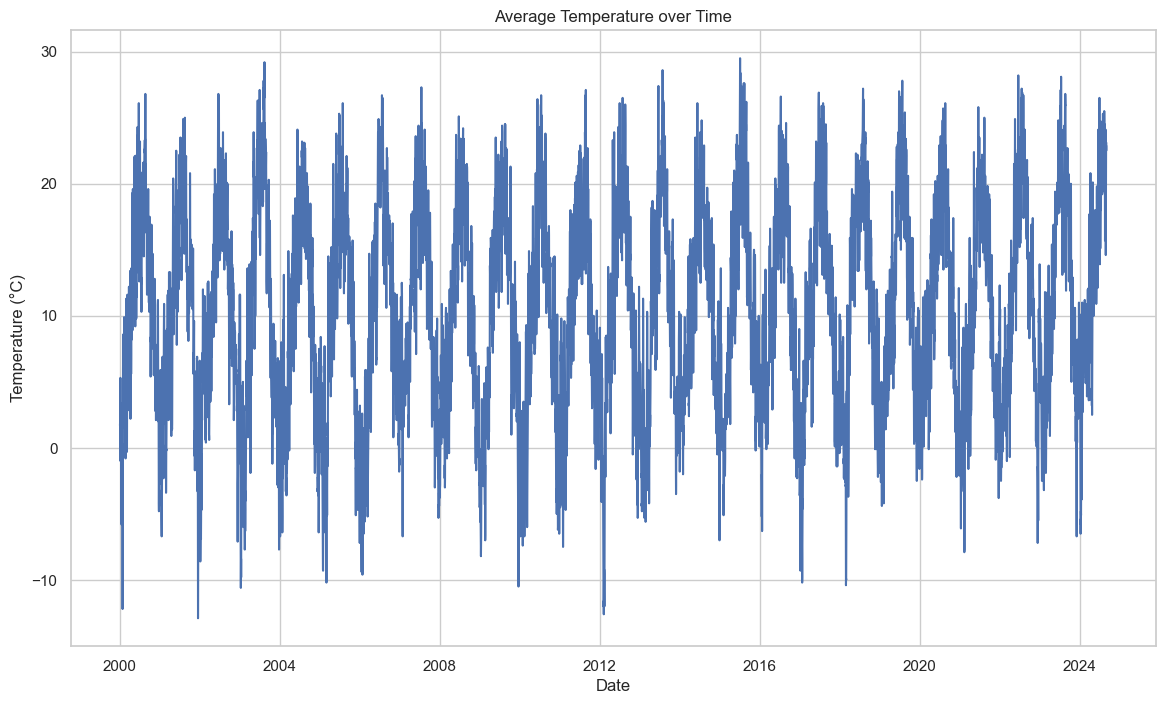

In [3]:
# 2. **Exploratory Data Analysis (EDA)**
print("First few rows of the data:")
print(data.head())

# Visualize the average temperature over time
plt.figure(figsize=(14, 8))
plt.plot(data['date'], data['tavg'], label="Avg. Temperature")
plt.title('Average Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

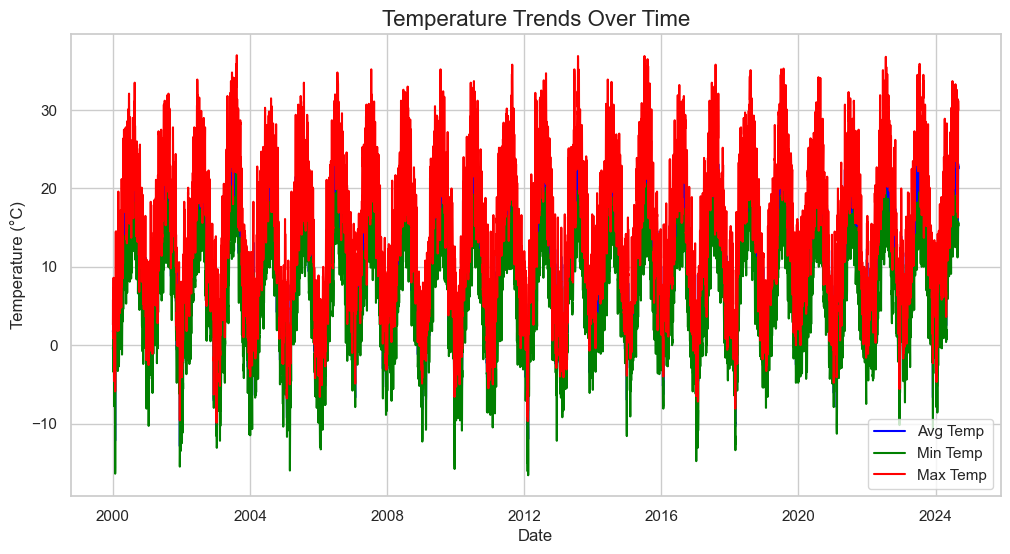

In [4]:
# Convert date column to datetime if it’s not already
data['date'] = pd.to_datetime(data['date'])

# Plotting temperatures over time
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['tavg'], label='Avg Temp', color='blue')
plt.plot(data['date'], data['tmin'], label='Min Temp', color='green')
plt.plot(data['date'], data['tmax'], label='Max Temp', color='red')
plt.title('Temperature Trends Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

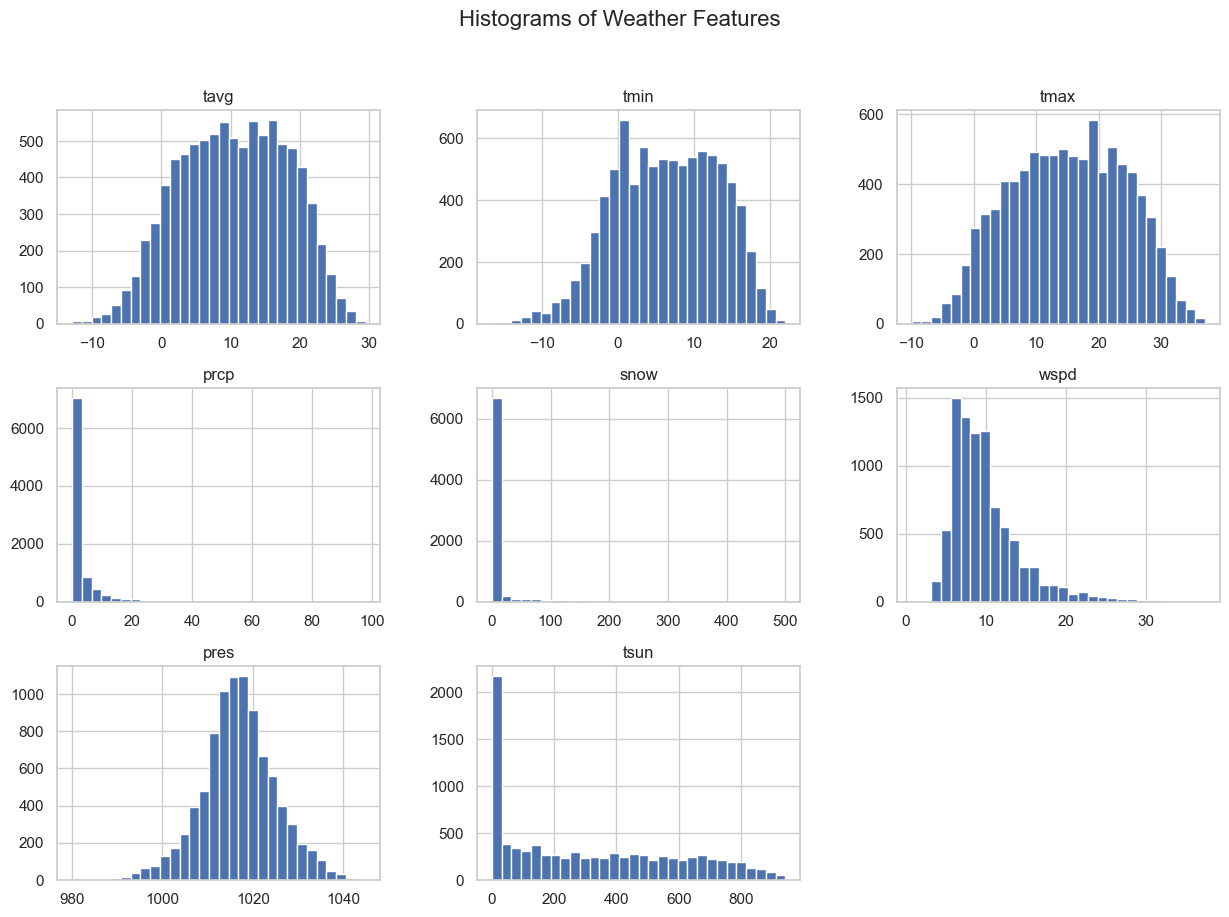

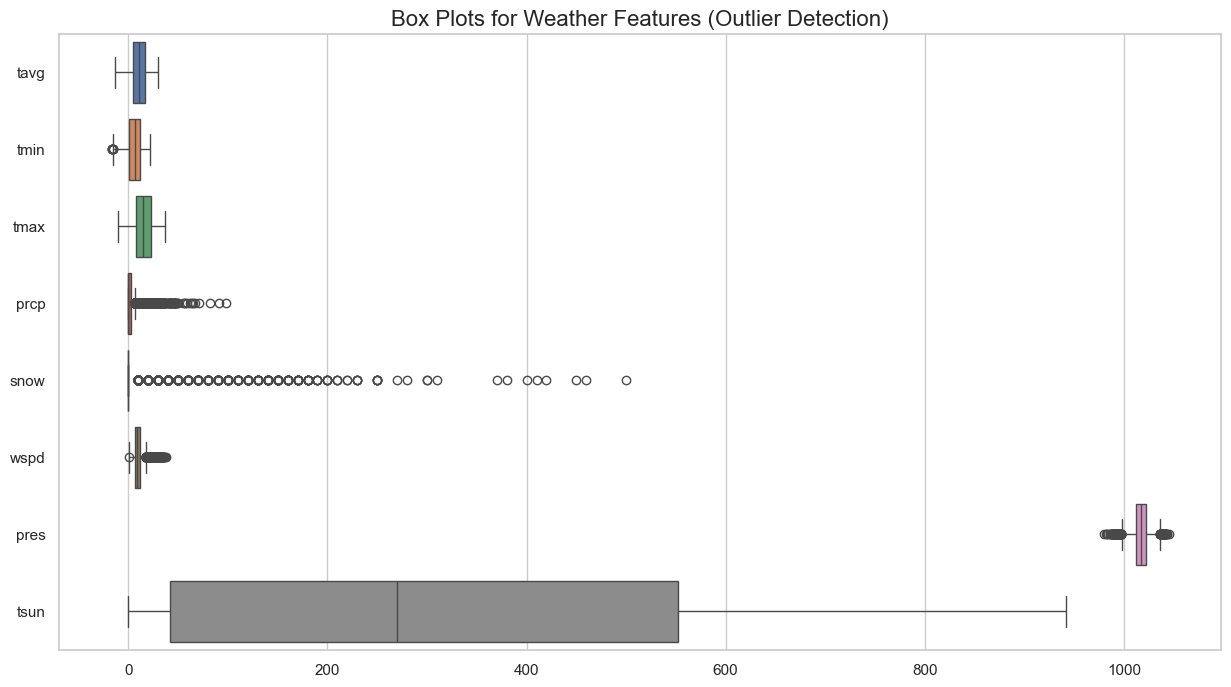

In [5]:
# Plot histograms for all numerical features
data[['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'pres', 'tsun']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Weather Features', fontsize=16)
plt.show()

# Plot box plots to check for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'pres', 'tsun']], orient="h")
plt.title('Box Plots for Weather Features (Outlier Detection)', fontsize=16)
plt.show()

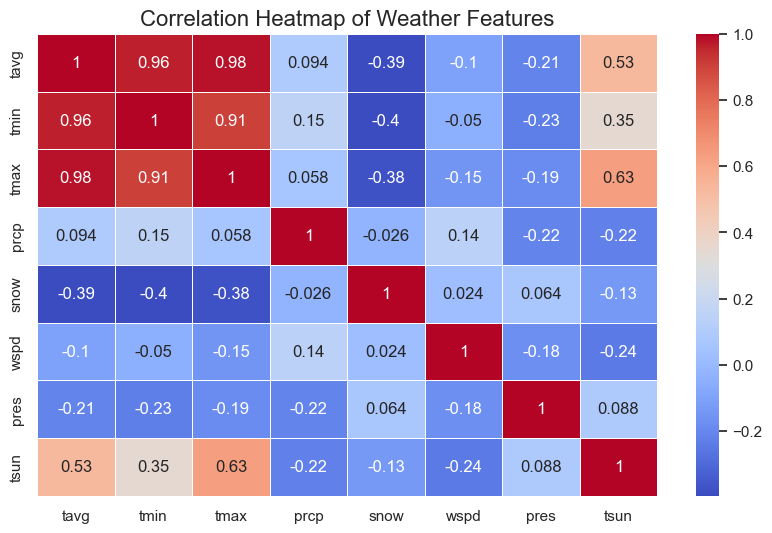

In [6]:
# Calculate the correlation matrix
corr_matrix = data[['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'pres', 'tsun']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Features', fontsize=16)
plt.show()

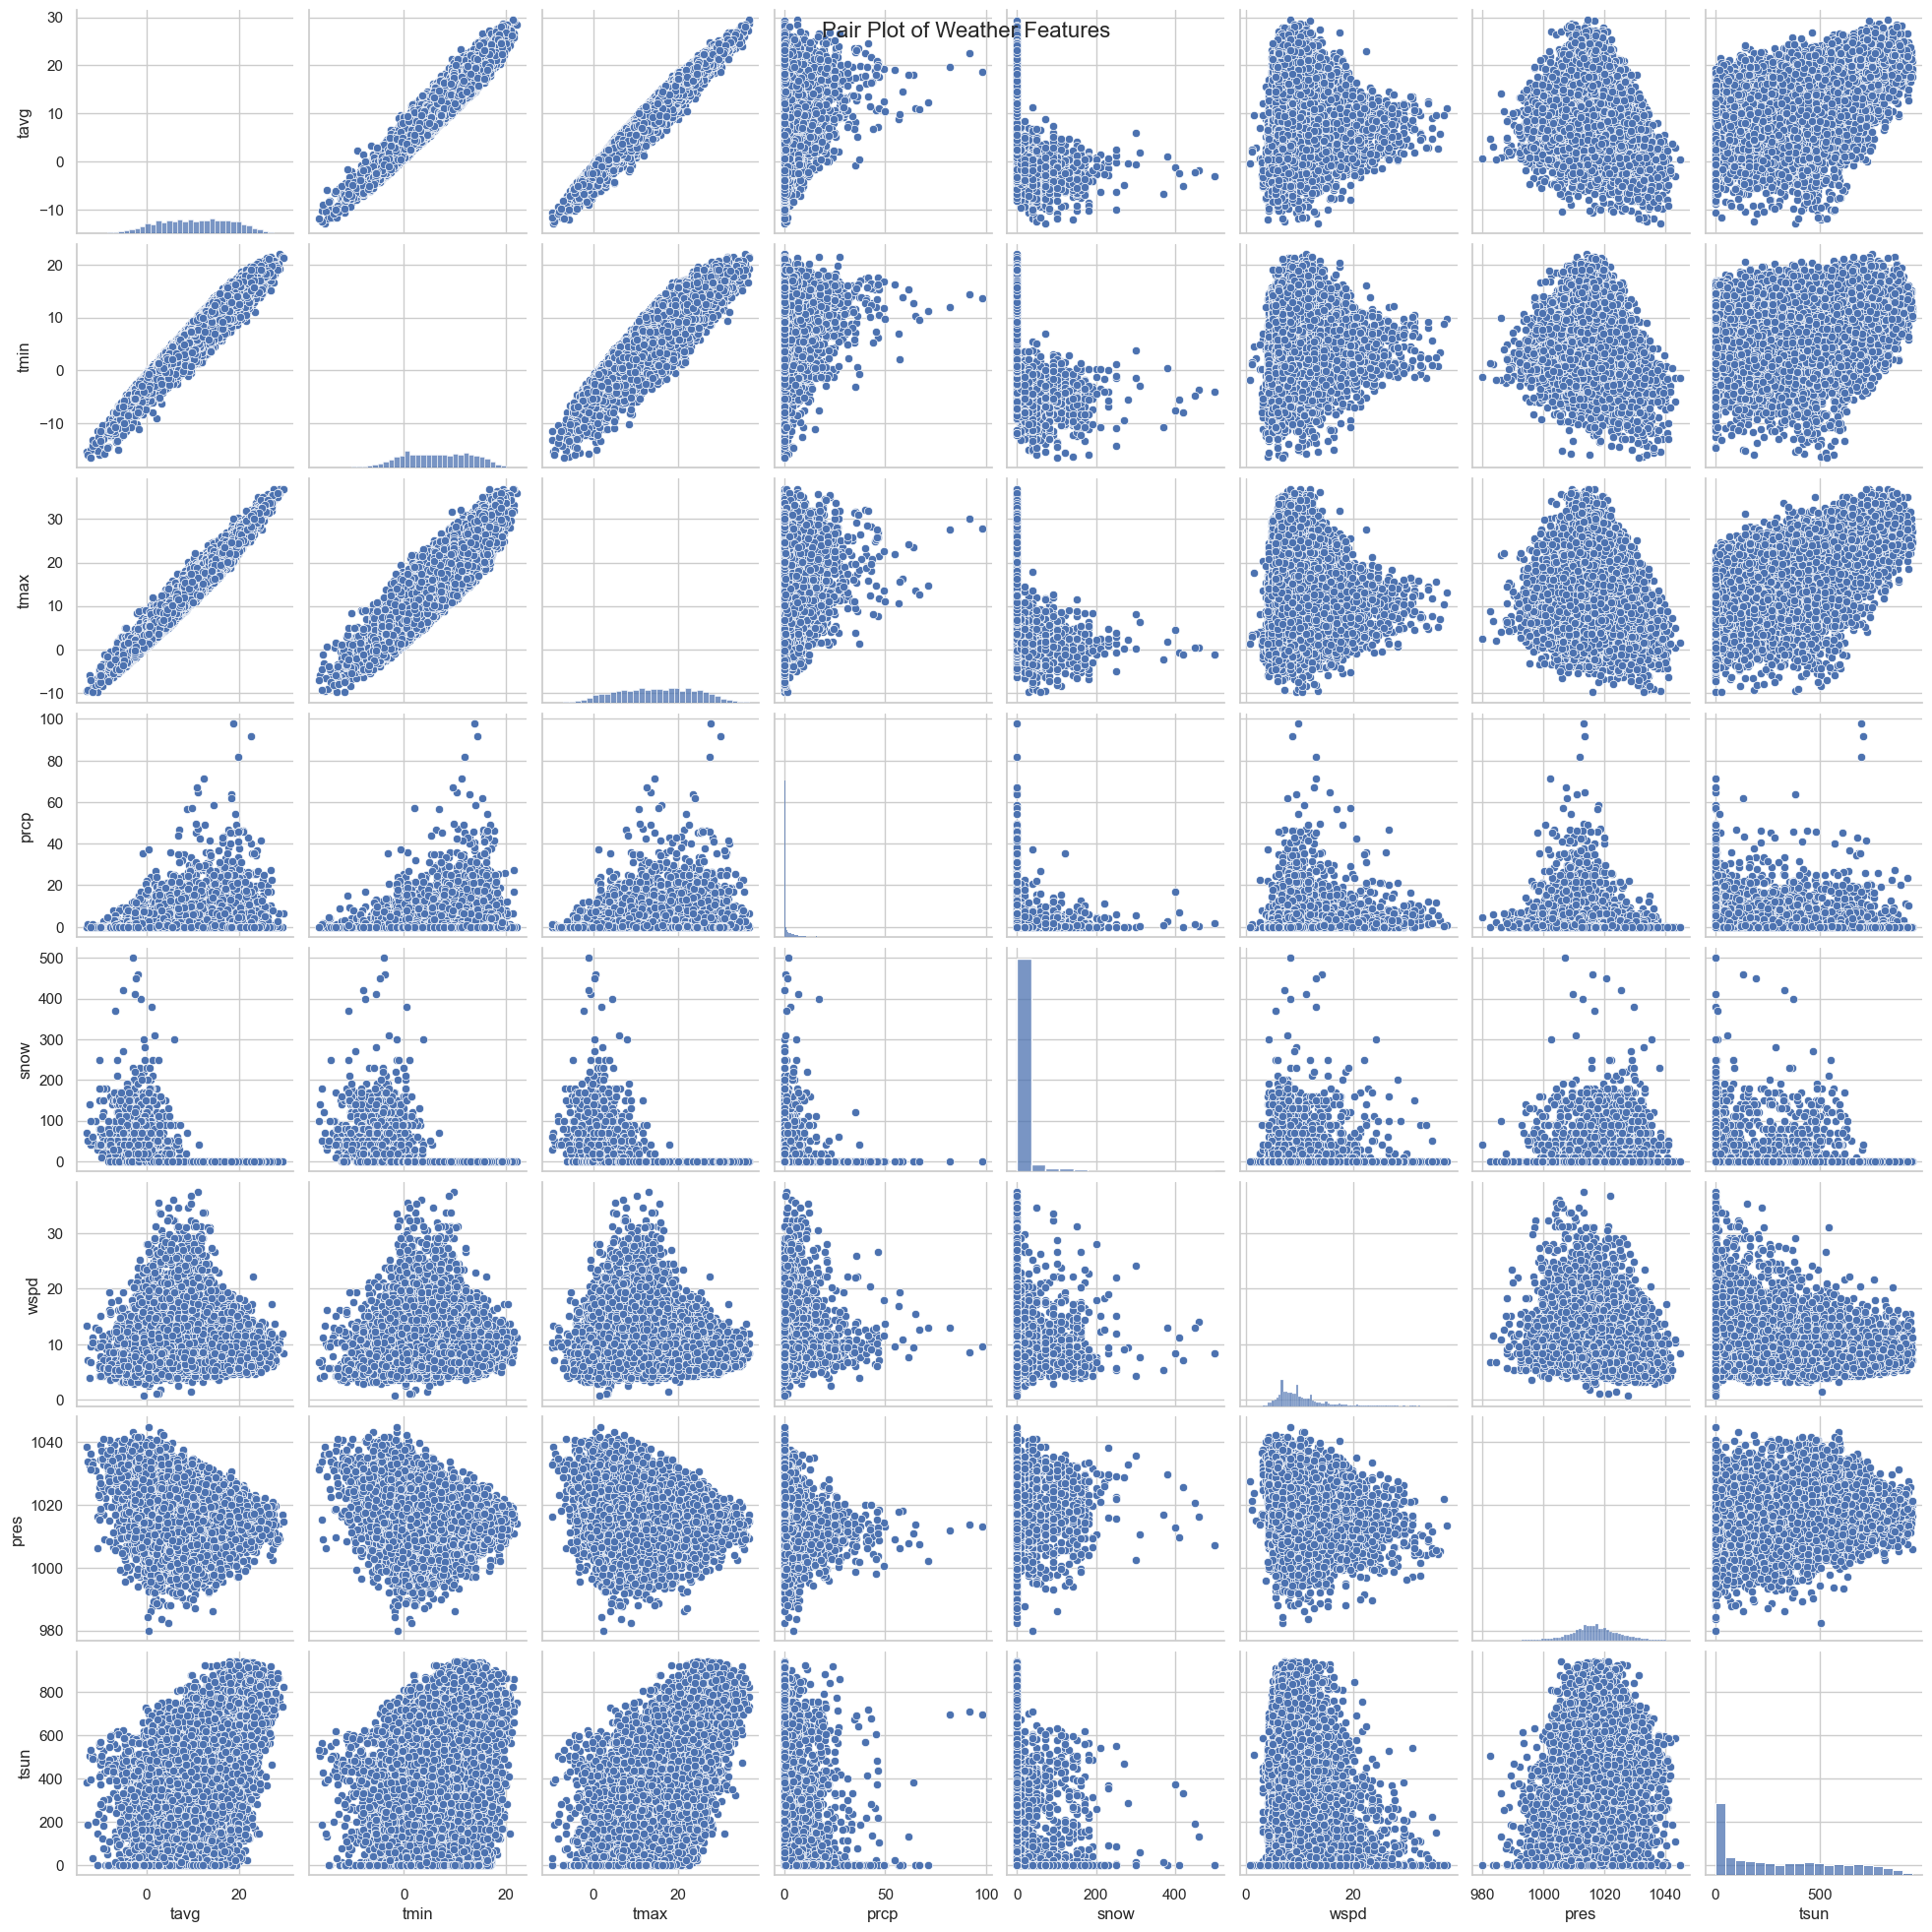

In [7]:
# Pair plot for all features
sns.pairplot(data[['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'pres', 'tsun']])
plt.suptitle('Pair Plot of Weather Features', fontsize=16)
plt.show()

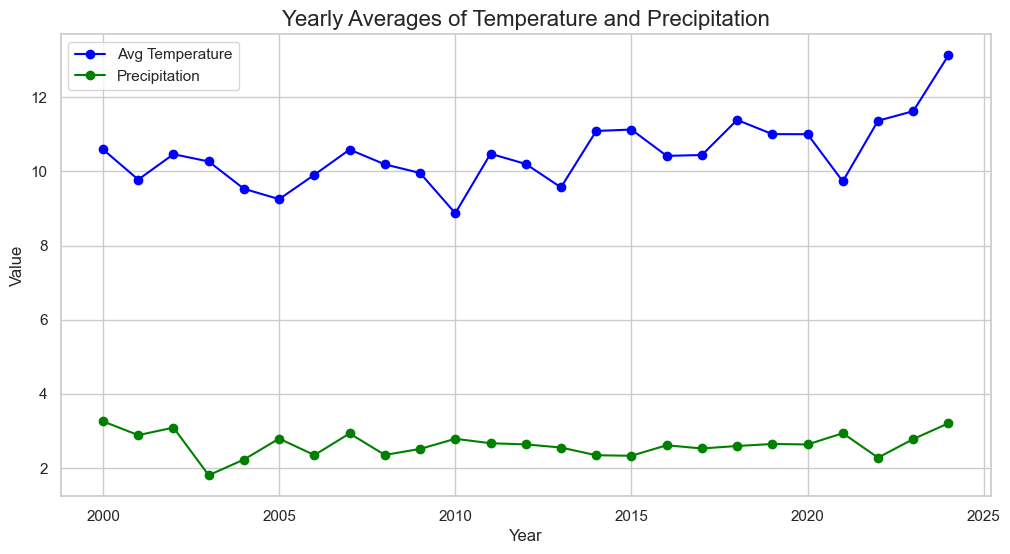

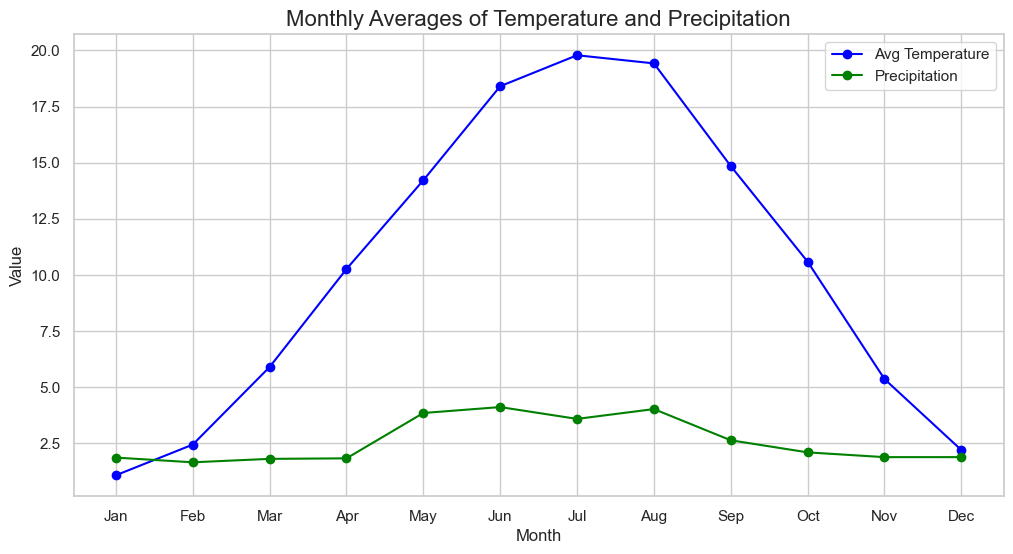

In [8]:
# Create new columns for year and month
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

# Group by year and calculate mean of weather features
yearly_avg = data.groupby('year').mean()

# Plot yearly averages of tavg (average temperature) and prcp (precipitation)
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg.index, yearly_avg['tavg'], label='Avg Temperature', color='blue', marker='o')
plt.plot(yearly_avg.index, yearly_avg['prcp'], label='Precipitation', color='green', marker='o')
plt.title('Yearly Averages of Temperature and Precipitation', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Group by month and calculate mean
monthly_avg = data.groupby('month').mean()

# Plot monthly averages of tavg (average temperature) and prcp (precipitation)
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg['tavg'], label='Avg Temperature', color='blue', marker='o')
plt.plot(monthly_avg.index, monthly_avg['prcp'], label='Precipitation', color='green', marker='o')
plt.title('Monthly Averages of Temperature and Precipitation', fontsize=16)
plt.xlabel('Month')
plt.xticks(np.arange(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

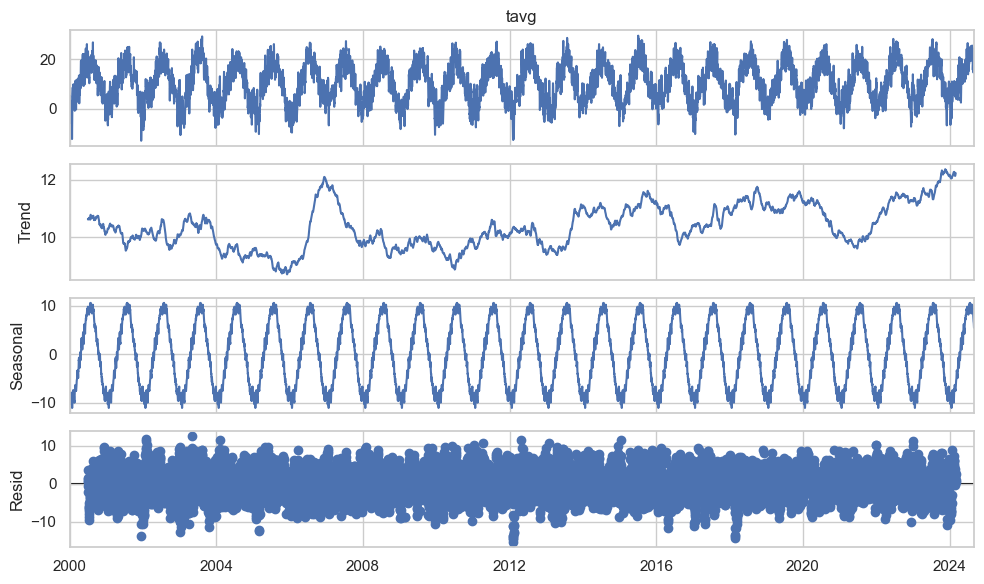

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the average temperature series
decomposition = seasonal_decompose(data.set_index('date')['tavg'], model='additive', period=365)

decomposition.plot()
plt.show()

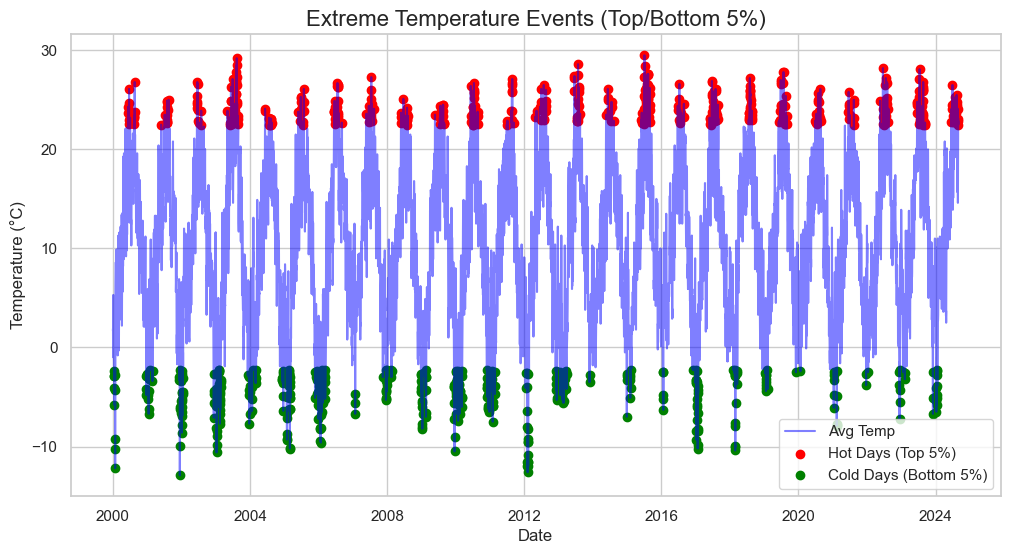

In [10]:
# Detecting extreme temperatures (e.g., top 5% hottest and coldest days)
hot_days = data[data['tavg'] >= data['tavg'].quantile(0.95)]
cold_days = data[data['tavg'] <= data['tavg'].quantile(0.05)]

plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['tavg'], label='Avg Temp', color='blue', alpha=0.5)
plt.scatter(hot_days['date'], hot_days['tavg'], label='Hot Days (Top 5%)', color='red')
plt.scatter(cold_days['date'], cold_days['tavg'], label='Cold Days (Bottom 5%)', color='green')
plt.title('Extreme Temperature Events (Top/Bottom 5%)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/gr/sd_rtfr170b__hlhhr8n3n240000gn/T/ipykernel_8676/1823532711.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='tavg', data=data, palette='coolwarm')


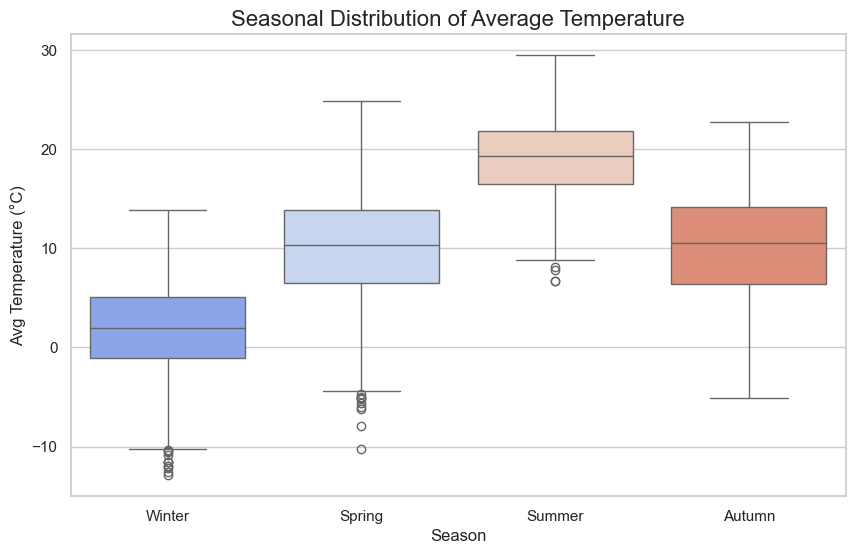

In [11]:
# Create a column for the season based on the month
data['season'] = data['month'].apply(lambda x: 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Autumn' if x in [9, 10, 11] else 'Winter')

# Plot seasonal boxplots for temperature
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='tavg', data=data, palette='coolwarm')
plt.title('Seasonal Distribution of Average Temperature', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Avg Temperature (°C)')
plt.show()

In [12]:
# 3. **Feature Engineering**

data = data.drop(['season'], axis=1)
# Make a copy of the data for scaling and keep the date column for future use
data_for_scaling = data.copy()

# Drop the 'date' column only for scaling purposes

data_for_scaling = data_for_scaling.drop(['date'], axis=1)
data_for_scaling.fillna(method='ffill', inplace=True)

# Scaling features to [0, 1] range
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_for_scaling)

# Define target variable (tavg - average temperature)
target_column_index = data_for_scaling.columns.get_loc('tavg')

# Create sequences for time series forecasting
def create_sequences(data, target_column_index, sequence_length):
    x, y = [], []
    for i in range(sequence_length, len(data)):
        x.append(data[i-sequence_length:i])
        y.append(data[i, target_column_index])
    return np.array(x), np.array(y)

sequence_length = 60  # Using past 60 time steps
x, y = create_sequences(scaled_data, target_column_index, sequence_length)

/var/folders/gr/sd_rtfr170b__hlhhr8n3n240000gn/T/ipykernel_8676/3883083464.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_for_scaling.fillna(method='ffill', inplace=True)


In [13]:
# 4. **Splitting Data into Train and Test Sets**

# Splitting data into train and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, shuffle=False)

# Further splitting the temporary set into validation and test sets
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, shuffle=False)

In [14]:
# 5. **Building the Enhanced LSTM Model**
model1 = Sequential()

# Adding a Bidirectional LSTM layer
model1.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(x_train.shape[1], x_train.shape[2])))
model1.add(Dropout(0.3))
model1.add(BatchNormalization())  # Adding Batch Normalization

# Adding another LSTM layer
model1.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(BatchNormalization())  # Adding Batch Normalization

# Adding a third LSTM layer
model1.add(LSTM(units=32, return_sequences=False))
model1.add(Dropout(0.3))
model1.add(BatchNormalization())  # Adding Batch Normalization

# Adding Dense layers for the output
model1.add(Dense(units=64, activation='relu'))
model1.add(Dropout(0.2))  # Dropout for regularization
model1.add(Dense(units=1))  # Output layer

# Compile the model with a learning rate scheduler
model1.compile(optimizer='adam', loss='mean_squared_error')

# 2. **Setting up Callbacks**
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# 3. **Training the Model**
history = model1.fit(x_train, y_train, epochs=200, batch_size=64, 
                      validation_data=(x_val, y_val), 
                      callbacks=[early_stop, reduce_lr])

model1.save('trained_model.h5')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 111ms/step - loss: 0.4598 - val_loss: 0.0226 - learning_rate: 0.0010
Epoch 2/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 17s 154ms/step - loss: 0.1017 - val_loss: 0.0092 - learning_rate: 0.0010
Epoch 3/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 159ms/step - loss: 0.0614 - val_loss: 0.0079 - learning_rate: 0.0010
Epoch 4/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - loss: 0.0450 - val_loss: 0.0118 - learning_rate: 0.0010
Epoch 5/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 162ms/step - loss: 0.0344 - val_loss: 0.0137 - learning_rate: 0.0010
Epoch 6/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 17s 154ms/step - loss: 0.0268 - val_loss: 0.0097 - learning_rate: 0.0010
Epoch 7/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - loss: 0.0234 - val_loss: 0.0103 - learning_rate: 0.0010
Epoch 8/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 19s 170ms/step - loss: 0.0191 - val_loss: 0.0085 - learning_rate: 0.0010
Epoch 9/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 19s 165ms/step - loss: 0.0170 - val_loss: 0.011

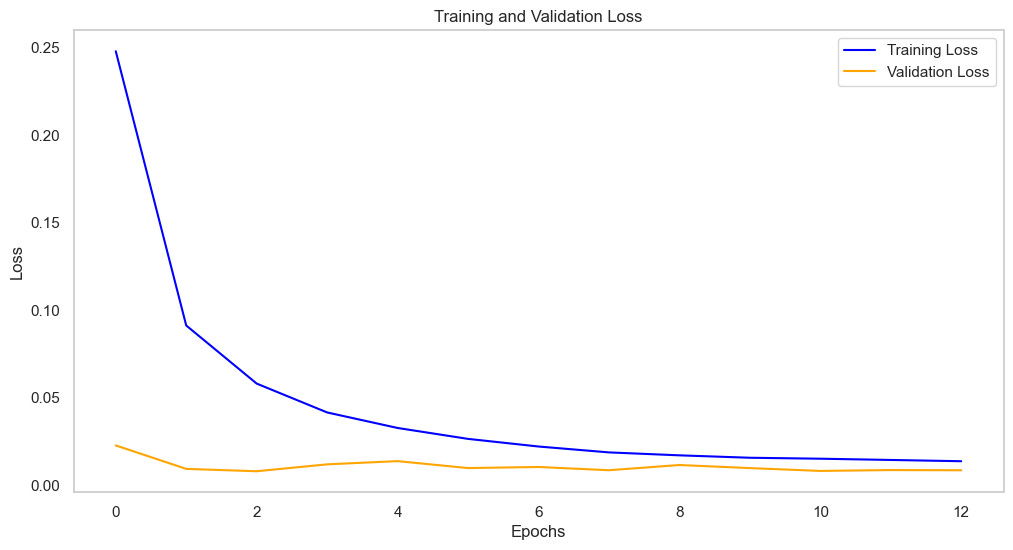

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [16]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('trained_model.h5')


# 7. **Evaluating the Model**

# Predicting on the test set
predictions = model.predict(x_test)

# Inverse transforming the predictions to the original scale
def inverse_transform(scaled, original, column_index):
    # Create an empty array of zeros with the same number of columns as the original data
    extended_data = np.zeros((scaled.shape[0], original.shape[1]))
    
    # Insert the scaled data (predictions) into the correct column (tavg column)
    extended_data[:, column_index] = scaled[:, 0]
    
    # Apply inverse transform on the extended data and return only the relevant column (tavg)
    return scaler.inverse_transform(extended_data)[:, column_index]

# Rescale the predicted values and test set targets
predictions_rescaled = inverse_transform(predictions, data_for_scaling, target_column_index)
y_test_rescaled = inverse_transform(y_test.reshape(-1, 1), data_for_scaling, target_column_index)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
r2 = r2_score(y_test_rescaled, predictions_rescaled)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Root Mean Squared Error (RMSE): 3.879638305437372
Mean Absolute Error (MAE): 3.0714239225307653
R² Score: 0.7257467209772301


In [17]:
# data = pd.read_csv('/Users/sahilnakrani/Documents/NN/Data/munich_weather_2000_2024.csv')

In [18]:
print(data.columns)

Index(['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun', 'year', 'month'],
      dtype='object')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


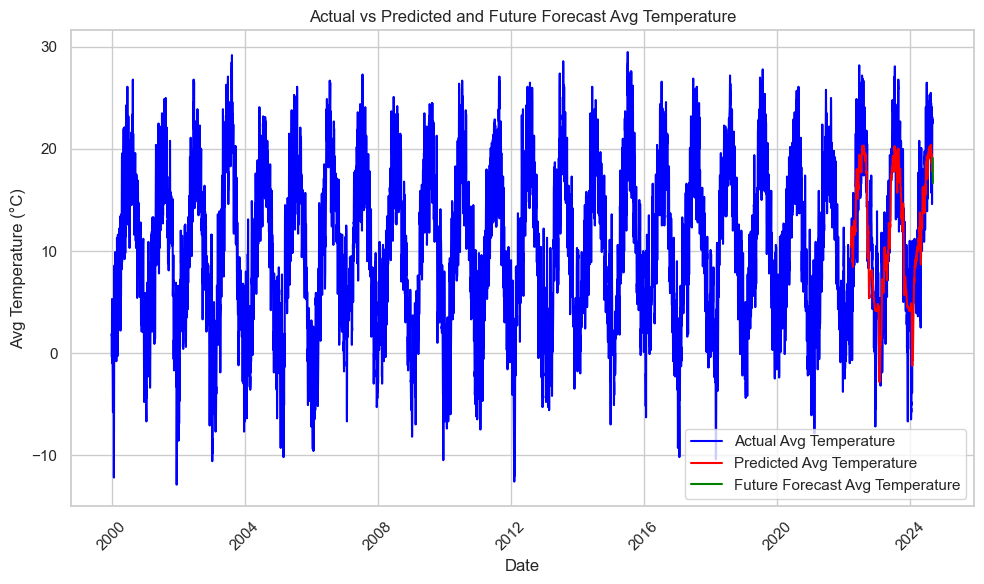

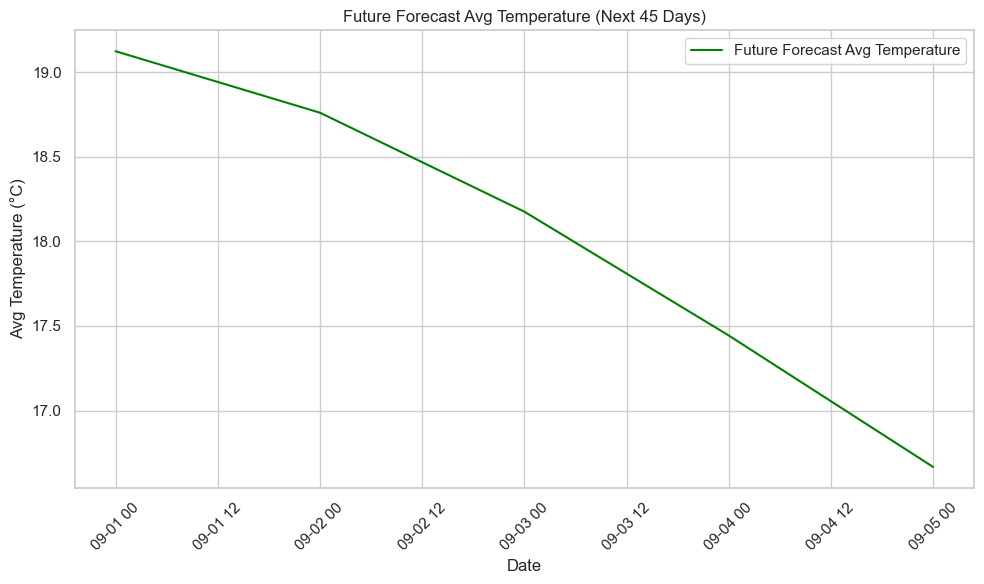

In [19]:
# Set the date column as the index for plotting
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Future predictions for the next 5 days
future_steps = 5
last_data = x_test[-1]  # Last input sequence from the test set
# Initialize the prediction list
future_predictions = []

# Reshape for prediction
last_data_reshaped = last_data.reshape(1, last_data.shape[0], last_data.shape[1])

# Set a smoothing factor
smoothing_factor = 0.8

for _ in range(future_steps):
    prediction = model.predict(last_data_reshaped)
    
    # Apply smoothing
    if future_predictions:  # If we have previous predictions
        smoothed_prediction = smoothing_factor * future_predictions[-1] + (1 - smoothing_factor) * prediction[0][0]
    else:
        smoothed_prediction = prediction[0][0]
    
    future_predictions.append(smoothed_prediction)

    # Prepare the next input
    new_data_point = np.zeros((1, data.shape[1]))  
    new_data_point[0, target_column_index] = smoothed_prediction  

    last_data = np.append(last_data[1:], new_data_point, axis=0)
    last_data_reshaped = last_data.reshape(1, last_data.shape[0], last_data.shape[1])

# Generate future dates based on the last date in the DataFrame
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq='D')

# Rescale future predictions back to the original temperature range
future_predictions = np.array(future_predictions).reshape(-1, 1)  # Reshape for inverse transform

# We need to apply the inverse transform to future predictions
future_predictions_rescaled = inverse_transform(future_predictions, data, target_column_index)

# Plot actual values, predictions, and future forecast
plt.figure(figsize=(10, 6))
# Plot actual values
plt.plot(data.index, data['tavg'], label='Actual Avg Temperature', color='blue')
# Plot predicted values (test set)
plt.plot(data.index[-len(y_test):], predictions_rescaled, label='Predicted Avg Temperature', color='red')
# Plot future forecast with rescaled future predictions
plt.plot(future_dates, future_predictions_rescaled, label='Future Forecast Avg Temperature', color='green')

plt.title('Actual vs Predicted and Future Forecast Avg Temperature')
plt.xlabel('Date')
plt.ylabel('Avg Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the future prediction for clarity
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_predictions_rescaled, label='Future Forecast Avg Temperature', color='green')
plt.title('Future Forecast Avg Temperature (Next 45 Days)')
plt.xlabel('Date')
plt.ylabel('Avg Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()